<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

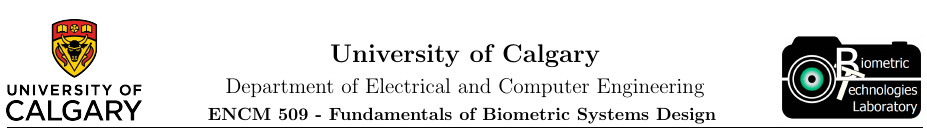

# ENCM 509 - Lab 2, Group 25

Linh Nguyen (30019908)

Nafisa Tabassum (10172713)

Pauline Abalos (30011136)

## Introduction

In this lab, we will be acquiring signature data using a WACOM's digitizing tablet, which can record coordinate values sampled at 200 points per second as the stylus moves. The coordinates, time, and pressure of the stylus as a signature is drawn will be logged into an Excel spreadsheet for later analysis. This will be repeated 30 times, to capture the data for 30 'genuine' signatures. Then, this process will be repeated another 30 times, except with a different person attempting to draw the same signature, giving us 30 'imposter' signatures. 

Using the data acquired, we can then statistically analyze it with various parameters, such as the velocity and pressure, and create a normal distribution curve for these parameters. As a result, we will have two distribution curves, one for the genuine user's signature data, and one for the imposters'. Then, we will be able to compare the two curves and identify the differences between the two users' signatures. 

## Exercises

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.

Real mean for 10 samples: 47.75
Real standard deviation for 10 samples: 6.45

Real mean for 1000 samples: 49.77
Real standard deviation for 1000 samples: 5.08


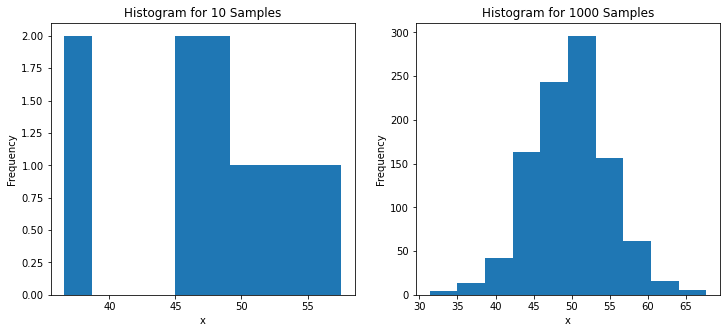

In [3]:
mu = 50 # Theoretical mean
std = 5 # Theoretical standard deviation
qtt_10samples = 10
qtt_1000samples = 1000

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

pop_norm_10 = norm.rvs(mu, std, size=qtt_10samples)
pop_norm_1000 = norm.rvs(mu, std, size=qtt_1000samples)

ax1.hist(pop_norm_10)
ax1.set_title("Histogram for 10 Samples")
ax1.set_xlabel("x")
ax1.set_ylabel("Frequency")

ax2.hist(pop_norm_1000)
ax2.set_title("Histogram for 1000 Samples")
ax2.set_xlabel("x")
ax2.set_ylabel("Frequency")

mean_10_samples = np.mean(pop_norm_10)
std_dev_10_samples = np.std(pop_norm_10)

mean_1000_samples = np.mean(pop_norm_1000)
std_dev_1000_samples = np.std(pop_norm_1000)

print("Real mean for 10 samples: {:.2f}".format(mean_10_samples))
print("Real standard deviation for 10 samples: {:.2f}\n".format(std_dev_10_samples))
print("Real mean for 1000 samples: {:.2f}".format(mean_1000_samples))
print("Real standard deviation for 1000 samples: {:.2f}".format(std_dev_1000_samples))

When using 10 samples, the mean of these data points is about 53.48, and the standard deviation is about 6.62. When the sample size is increased to 1000, the mean is then 49.98 and the standard deviation is 5.08. The mean of the two sample sizes is expected to be different values, since a larger sample size will have more values to include in the average than the smaller sample, resulting in a different value. On the other hand, sample size will not have a direct impact on the standard deviation, since it is just a measure of how far the data is relative to the mean. In this case, with the sample size of 10 and standard deviation of 6.62, the data set is further from the mean than it is in the sample size of 1000, which has a lower standard deviation of 5.08.

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a genuine person, and an "impostor" signature that replicates the shape but not the original pressure. Load the sample signature provided.

Using Matplotlib, a colormap for the sampled signature can be created to represent the amount of pressure used by the imposter when drawing the signature.

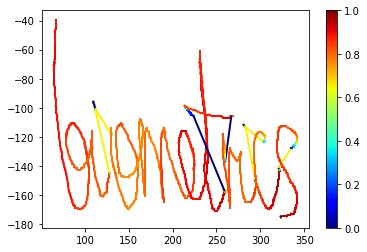

In [4]:
subdir = 'impostor/'
data_dir = './signature_samples/biometrics/' + subdir
csv_file = pd.read_csv(data_dir + '1.csv')

csv_file.head()

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

prs1 = prs1/np.max(prs1)*255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], linewidth=2, c=c)
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)

The mean and standard deviation for the sampled signature is calculated below, as well as the plot for the normal distribution.

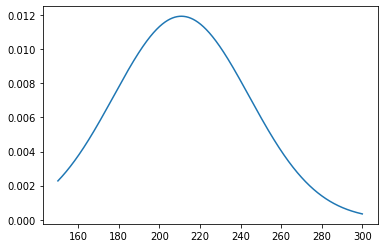

In [5]:
mean = np.mean(prs1)
sd = np.std(prs1)

x = np.arange(150, 300, 0.01)
y = norm.pdf(x, mean, sd)
plt.plot(x,y)

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

The statement `if time_diff == 0` is necessary because for a velocity calculation, you cannot divide by a zero time value.
To calculate velocity, we use the formula 

$$velocity = \frac{displacement}{\Delta time}$$ 

We can't divide a fraction by 0, so the purpose of the line `if time_diff == 0` is so that if the pen movement between two points was too fast to be captured by the software, it will still allow us to calculate the velocity by using a really small value (0.0001), rather than 0.

- **Exercise 4** (3 marks): Now we perform statistical analysis of pressure and velocity distribution across 30  signatures of the same person. We will represent the pressure  of each signature by its 'mean value', and then consider the distribution of these means across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate mean values and standard deviation for   pressure, and separately for velocity. Create a  normal distribution of the values across the signatures of the same individual. 

In [6]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

Mean for velocity: 21.79195536188001
Standard deviation for velocity 8.887452580304547

Mean for pressure: 0.3926727624021132
Standard deviation for pressure: 0.01070125511207366


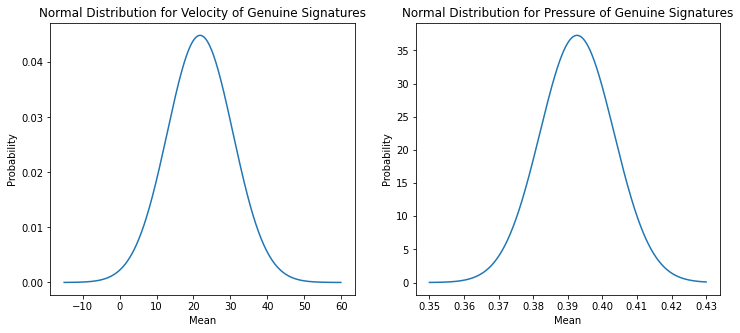

In [27]:
# Columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

data_dir = "./signatures/genuine/"

for i in range(30):
    csv_file = pd.read_csv(data_dir + "{}.csv".format(i+1))

    coord = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coord)

    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)

    stats_measures[i, 2] = np.mean(prs)
    stats_measures[i, 3] = np.std(prs)

mean_vel = stats_measures[:,0].mean()
std_vel = stats_measures[:,1].std()
mean_pressure = stats_measures[:,2].mean()
std_pressure = stats_measures[:,3].std()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

x1 = np.arange(-15, 60, 0.1)
x2 = np.arange(0.35, 0.43, 0.0001)

pdf_vel = norm.pdf(x1, mean_vel, std_vel)
pdf_pressure = norm.pdf(x2, mean_pressure, std_pressure)

ax1.plot(x1, pdf_vel)
ax1.set_title("Normal Distribution for Velocity of Genuine Signatures")
ax1.set_xlabel("Mean")
ax1.set_ylabel("Probability")

ax2.plot(x2, pdf_pressure)
ax2.set_title("Normal Distribution for Pressure of Genuine Signatures")
ax2.set_xlabel("Mean")
ax2.set_ylabel("Probability")

print("Mean for velocity: {}".format(mean_vel))
print("Standard deviation for velocity {}\n".format(std_vel))
print("Mean for pressure: {}".format(mean_pressure))
print("Standard deviation for pressure: {}".format(std_pressure))

- **Exercise 5** (3 marks): Now  perform statistical analysis of pressure and velocity distribution across 30 impostor signatures. As an "Impostor", you can use either the 30 "forged" signatures (or part b of the pre-recorded set), or 30 writing by yourself by of different shape/word (or part c of the pre-recorded set). Represent the pressure (or velocity) of each signature by its mean, and then consider the distribution of these \emph{means} across impostor signatures. Draw a conclusion about the distributions for "genuine" signatures from Exercise 4 and the "impostor" ones from Exercise 5.

Mean for velocity: 15.63493598331671
Standard deviation for velocity 5.926798511111932

Mean for pressure: 0.3394080076902812
Standard deviation for pressure: 0.010818053949558927


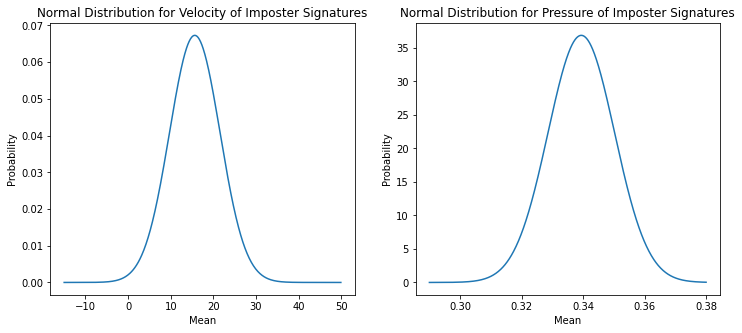

In [35]:
# Columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

data_dir = "./signatures/imposter/"

for i in range(30):
    csv_file = pd.read_csv(data_dir + "{}.csv".format(i+1))

    coord = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coord)

    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)

    stats_measures[i, 2] = np.mean(prs)
    stats_measures[i, 3] = np.std(prs)

mean_vel = stats_measures[:,0].mean()
std_vel = stats_measures[:,1].std()
mean_pressure = stats_measures[:,2].mean()
std_pressure = stats_measures[:,3].std()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

x1 = np.arange(-15, 50, 0.1)
x2 = np.arange(0.29, 0.38, 0.0001)

pdf_vel = norm.pdf(x1, mean_vel, std_vel)
pdf_pressure = norm.pdf(x2, mean_pressure, std_pressure)

ax1.plot(x1, pdf_vel)
ax1.set_title("Normal Distribution for Velocity of Imposter Signatures")
ax1.set_xlabel("Mean")
ax1.set_ylabel("Probability")

ax2.plot(x2, pdf_pressure)
ax2.set_title("Normal Distribution for Pressure of Imposter Signatures")
ax2.set_xlabel("Mean")
ax2.set_ylabel("Probability")

print("Mean for velocity: {}".format(mean_vel))
print("Standard deviation for velocity {}\n".format(std_vel))
print("Mean for pressure: {}".format(mean_pressure))
print("Standard deviation for pressure: {}".format(std_pressure))

For the genuine signatures, the velocity of the stylus had a mean of 21.7920 and a standard deviation of 8.8875, while the pressure had a mean of 0.3927 and a standard deviation of 0.0107. The imposter signature a velocity mean of 15.6349 and a standard deviation of 5.9267. The pressure for the imposter signatures had a mean of 0.3394 and a standard deviation of 0.0108.

While the normal distribution curve for the pressure used when drawing the signatures is very similar for both the genuine and imposter signatures, the velocity distribution curve is very different between the two users. The imposter has a much lower velocity mean than the genuine, meaning that they took a much longer time drawing each signature than the genuine user, which could be attributed to hesitance and attempting to perfectly draw a signature that they are not used to drawing. With this information, it is evident that the imposter signatures were drawn by a different user than the genuine signatures.

- **BONUS**  (3 marks): Propose a solution to the following: some signatures have pen-off fragment. Such fragment are plotted by connecting the start and end points by a straight line which is not a correct representation of the signature. Hint: replace pen-up locations (using some threshold for the pressure values, found by trial) with NaN (not-a-number) or use other approach (such as analyzing if time breaks are less than certain value, for instance, 20ms).

At the moment the pen is lifted from the writing surface, the axial force of the pen drops to zero. Since pressure is directly proportional to force, pressure values of zero would likely indicate that the pen was lifted at that point in time. Significant differences in the x and y coordinates following the zero pressure data points would also indicate that lifting occurred between the final point of the first character and the initial point of the next character. These data points can be filtered out by setting them to NaN.

Through trials, the threshold for pressure values can be determined where "pressed" means that the pen pressure is >= minimum pen pressure. "Lifted" means that the pressure is < minimum pen pressure but the lift is not so high that data is not registered.

## Conclusion

In this lab, we aquired various paramaters of signature data, such as time and pressure, via WACOM's digitiing tablet. With this data, we were able to create a colormap to visualize the difference in pressure in an imposter's signature versus the genuine signature. We were also able to create normal distribution curves for the velocity and pressure used to draw the signatures. By comparing these curves, as well as using the calculated mean and standard deviation for each parameter, we are able to support the fact that the imposter signatures are drawn by a different user.